In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: /home/codespace/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ex1tfb2y/sklearn_71dbf9041c2b4e8fa5a6ec36bf414000/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ex1tfb2y/sklearn_71dbf9041c2b4e8fa5a6ec36bf414000/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-ip_9hj37
         cwd: /tmp/pip-install-ex1tfb2y/sklearn_71dbf9041c2b4e8fa5a6ec36bf414000/
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install

    ERROR: Command errored out with exit status 1:
     command: /home/codespace/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ex1tfb2y/sklearn_6e3eccbe4eda4badbbbdc5b02e770de1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ex1tfb2y/sklearn_6e3eccbe4eda4badbbbdc5b02e770de1/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-dvbkz1_w
         cwd: /tmp/pip-install-ex1tfb2y/sklearn_6e3eccbe4eda4badbbbdc5b02e770de1/
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0054e910d7f9d39a024a95fb8b0d1e0dd8f47841571dfd6119909972bc391f8d
  Stored in directory: /home/codespace/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install pyarrow


     |████████████████████████████████| 42.7 MB 96 kB/s  eta 0:00:01


In [3]:
import pandas as pd

In [3]:
import pickle

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:

!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet


--2026-01-15 20:18:51--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.165.247.187, 3.165.247.163, 3.165.247.79, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.165.247.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1178451 (1.1M) [binary/octet-stream]
Saving to: ‘green_tripdata_2025-01.parquet’

green_tripdata_2025 100%[===================>]   1.12M  1.93MB/s    in 0.6s    

2026-01-15 20:18:52 (1.93 MB/s) - ‘green_tripdata_2025-01.parquet’ saved [1178451/1178451]



In [22]:
df = pd.read_parquet('green_tripdata_2025-01.parquet')

df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

print(f"Shape after cleaning: {df.shape}")
print("Duration stats:", df['duration'].describe())



Shape after cleaning: (46307, 22)
Duration stats: count    46307.000000
mean        13.493045
std          8.627705
min          1.000000
25%          7.550000
50%         11.450000
75%         16.983333
max         60.000000
Name: duration, dtype: float64


In [36]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numerical)
    ])

model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),  # ✅ FIXED
        ('num', 'passthrough', numerical)
    ])),
    ('ridge', Ridge())
])
model = Pipeline([
    ('prep', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numerical)
    ])),
    ('ridge', Ridge())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 6.838981705189193


In [6]:
conda update scikit-learn


Solving environment: | 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==1.0.2=py39h51133e4_1

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/codespace/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.8.1           |   py39h06a4308_0          55 KB
    pyjwt-2.10.1               |   py39h06a4308_0          75 KB
    ------------------------------------------------------------
                                           Total:     

In [38]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred)

44.507399563846235

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

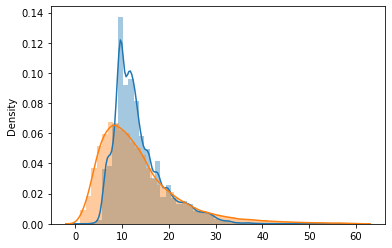

In [41]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')


In [42]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [45]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet   

--2026-01-15 20:38:08--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.165.247.163, 3.165.247.79, 3.165.247.187, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.165.247.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333519 (1.3M) [binary/octet-stream]
Saving to: ‘green_tripdata_2021-01.parquet’

green_tripdata_2021 100%[===================>]   1.27M  2.04MB/s    in 0.6s    

2026-01-15 20:38:09 (2.04 MB/s) - ‘green_tripdata_2021-01.parquet’ saved [1333519/1333519]

--2026-01-15 20:38:10--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.165.247.187, 3.165.247.163, 3.165.247.79, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.165.247.187|:443... connected.
HTTP request sent,

In [46]:
df_train = read_dataframe('green_tripdata_2021-01.parquet')
df_val = read_dataframe('green_tripdata_2021-02.parquet')

In [47]:
len(df_train), len(df_val)

(73908, 61921)

In [48]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [49]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [50]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

55.94385011743112

In [55]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [54]:
import os
import pickle


os.makedirs('models', exist_ok=True)

with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [57]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

124.70805194645156